# Ridge regression demo

In this demo, we see how Ridge regression behaves on a simple toy problem. The simulated data is the same as with the k-nn example.

## Simulation

The data is generated by the function

$$y = sin(2\pi x) +\epsilon $$ where $x$ is the input attribute, $y$ the target variable and $\epsilon$ random noise. On most real data science problems we would have (many) more input attributes, but this simple setting is considered here so we can visualize the results with (x,y)-plots. We restrict ourselves to interval $x\in[0,1]$.

## Goal of this demo

To visualize what ridge regression does, and demonstrate the importance of controlling model complexity to find balance between over- and underfitting

## Imported functions

Ridge implements ridge regression.  

mean_squared_error computes $\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$, that is, the squared difference betweeen true target values $y_i$ and the predicted target values $\hat{y}_i$. We use it to characterize how close the predictions of k-nn are to the real target function over the interval $[0,1]$.

PolynomialFeatures is a feature extractor that allows us to generate polynomial features, i.e. map $x\rightarrow [1, x, x^2,x^3,...,x^d]$ (recall the discussion about non-linear feature generation on the data preparation lecture, and the overfitting simulation on the principels of modeling -lecture).

If we would have several features the extractor would generate also the cross terms, so for example $[a,b,c]\rightarrow [1, a, b, c, a^2, b^2, c^2, ab, ac, bc, abc, a^2b, a^2c, ab^2, b^2c, ac^2 bc^2, a^3, b^3, c^3]$, if degree=3. This becomes soon computationally infeasible as number of original features and/or degree of polynomial increases, but using the Kernel Trick this can be done efficiently (see e.g. https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge for non-linear ridge regression using the kernel trick).

In [1]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

#simulation:
#x uniformly distributed between 0 and 1
#y = sin(2*pi*x) + epsilon, where epsilon is random Gaussian noise
def generate(n, seed, noise=0.1):
    #create an instance of numpy pseudo-random number generator
    generator = np.random.RandomState(seed)
    x = generator.uniform(0,1,n)
    y = np.sin(2*np.pi*x) + noise*generator.randn(n)
    return x, y


def polynomial_regression(x_train, y_train, x_test, degree, alpha):
    feature_extractor = PolynomialFeatures(degree=degree)
    feature_extractor.fit(x_train.reshape(-1, 1))
    X_train = feature_extractor.transform(x_train.reshape(-1, 1))
    X_test = feature_extractor.transform(x_test.reshape(-1, 1))
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    p = ridge.predict(X_test)
    return p
    


In [2]:
import matplotlib.pyplot as plt
x_train, y_train = generate(10, 3, 0.15)
#x_test, y_test = generate(10, 4, 0.15)
plt.scatter(x_train,y_train, color="blue", label="training data")
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2 * np.pi * t)
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## Linear regression

Let's start by applying linear regression. First an unregularized linear model with $\lambda=0$, and then a regularized linear model with $\lambda=5$.

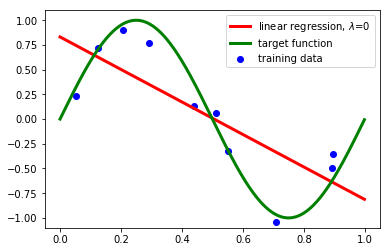

In [3]:
s_pred = polynomial_regression(x_train, y_train, t, 1, alpha=0.0)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label=r"linear regression, $\lambda$=0")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-1.1, 1.1])
plt.show()

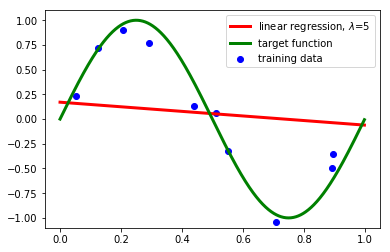

In [4]:
s_pred = polynomial_regression(x_train, y_train, t, 1, alpha=5)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label=r"linear regression, $\lambda$=5")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-1.1, 1.1])
plt.show()

Well, that didn't work out. We can't model a sine function with a linear function $a*x+b$ no matter how we tune $a$ and $b$. The model is hopelessly underfit, and regularization just penalizes the coefficients of the linear function pushing it towards zero constant function. We need more expressive hypothesis set, so let's try generating polynomial features up to degree 10.

/home/ajairo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


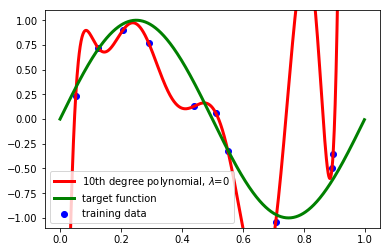

In [5]:
s_pred = polynomial_regression(x_train, y_train, t, 10, alpha=0.0)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="10th degree polynomial, $\lambda$=0")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-1.1, 1.1])
plt.show()

Well, it's definitely more flexible, but now we are using all that flexibility just to overfit to our data. Let's add regularization to penalize model complexity ($\lambda=0.01$).

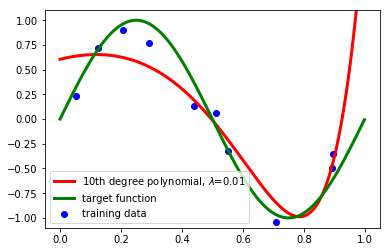

In [6]:
s_pred = polynomial_regression(x_train, y_train, t, 10, alpha=0.01)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="10th degree polynomial, $\lambda$=0.01")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-1.1, 1.1])
plt.show()

Work's quite ok. Note that I would not trust this function outside the range of my training data, as it shoots to heavens after the last training data point. Let's add more regularization with $\lambda=1$.

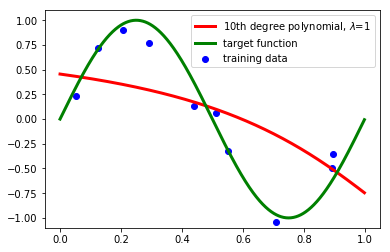

In [7]:
s_pred = polynomial_regression(x_train, y_train, t, 10, alpha=1)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="10th degree polynomial, $\lambda$=1")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-1.1, 1.1])
plt.show()

OK, now I'm already in the overfitting zone. Now a larger simulation with 100 training points, more noise and 100 degree polynomials.

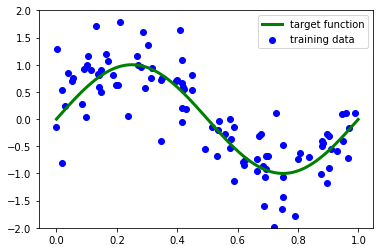

In [8]:
x_train2, y_train2 = generate(100, 1, 0.5)
plt.scatter(x_train2, y_train2, color="blue", label="training data")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-2, 2])
plt.show()

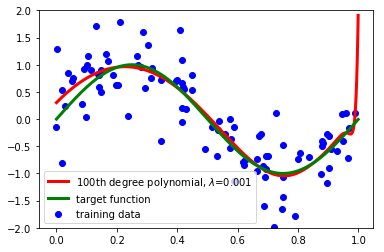

In [9]:
s_pred = polynomial_regression(x_train2, y_train2, t, 100, 0.001)
plt.scatter(x_train2,y_train2, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="100th degree polynomial, $\lambda$=0.001")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.ylim([-2, 2])
plt.legend()
plt.show()

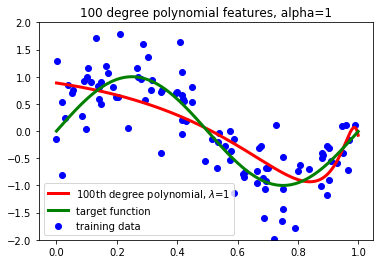

In [10]:
s_pred = polynomial_regression(x_train2, y_train2, t, 100, 1)
plt.scatter(x_train2,y_train2, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="100th degree polynomial, $\lambda$=1")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.title("100 degree polynomial features, alpha=1")
plt.legend()
plt.ylim([-2, 2])
plt.show()

Final note: using 100 degree polynomial is an overkill, let's try last 10th degree polynomial now on this data set.

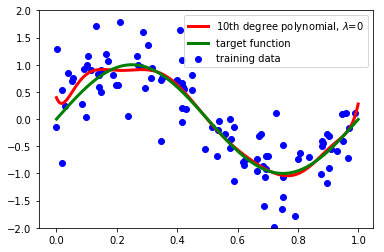

In [11]:
s_pred = polynomial_regression(x_train2, y_train2, t, 10, 0)
plt.scatter(x_train2,y_train2, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="10th degree polynomial, $\lambda$=0")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.ylim([-2, 2])
plt.show()